<a href="https://colab.research.google.com/github/berreearsln/MelbourneHousingMarket/blob/main/MHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Requared Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from scipy.stats import zscore

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Examine The Dataset

In [ ]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploratory Data Aanalysis

The information of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
print(f'Shape      : {df_copy.shape}\n'
      f'Size       : {df_copy.size}\n'
      f'Dimension  : {df_copy.ndim}\n\n'
      f'Data types : {df_copy.dtypes}')

Shape      : (34857, 21)
Size       : 731997
Dimension  : 2

Data types : Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Memory usage and range index.

In [ ]:
memory_usage = df_copy.memory_usage(deep=True)
print(f"Memory Usage: {memory_usage}")

range_index = df_copy.index
print(f"\n\nRange Index:{range_index}")

Memory Usage: Index                128
Suburb           2329116
Address          2459209
Rooms             278856
Type             2021706
Price             278856
Method           2036646
SellerG          2206153
Date             2325476
Distance          278856
Postcode          278856
Bedroom2          278856
Bathroom          278856
Car               278856
Landsize          278856
BuildingArea      278856
YearBuilt         278856
CouncilArea      2744297
Lattitude         278856
Longtitude        278856
Regionname       2713700
Propertycount     278856
dtype: int64


Range Index:RangeIndex(start=0, stop=34857, step=1)


In [ ]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

## Feature engineering

In [ ]:
df_copy.drop_duplicates(inplace=True)
df_copy

In [ ]:
df_copy.dropna(subset=['Price'], inplace=True)
df_copy

In [ ]:
df_copy.drop(columns=['Bedroom2'], inplace=True)
df_copy

Değişkenleri kategorik ve nümerik olarak ikiye bölelim.

In [ ]:
cat_cols=["Suburb", "Type", "Method", "Date", "Regionname", "Bathroom", "Car", "Distance"]
num_cols=["Rooms", "Price", "Landsize", "BuildingArea", "YearBuilt"]

In [ ]:
for column in cat_cols:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

for column in num_cols:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mean())

In [ ]:
z_scores=pd.DataFrame(zscore(df_copy[num_cols]), columns=num_cols)

threshold=3


outliers = z_scores[(z_scores > threshold).any(axis=1)]
outlier_indices = outliers.index
outlier_values = df_copy.loc[outlier_indices]


outlier_values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
81,Airport West,11 Harrington Rd,6,h,725000.0,SP,Barry,7/05/2016,13.5,3042.0,3.0,2.0,976.000000,186.000000,1980.000000,Moonee Valley City Council,-37.72390,144.87350,Western Metropolitan,3464.0
166,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,2.0,0.0,147.000000,146.000000,1890.000000,Port Phillip City Council,-37.84730,144.95510,Southern Metropolitan,3280.0
178,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,25/02/2017,3.3,3206.0,2.0,1.0,330.000000,207.000000,1910.000000,Port Phillip City Council,-37.84770,144.95580,Southern Metropolitan,3280.0
182,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,26/07/2016,3.3,3206.0,2.0,2.0,325.000000,156.834586,1966.609153,Port Phillip City Council,-37.84130,144.95000,Southern Metropolitan,3280.0
387,Armadale,11/17 Myamyn St,2,u,3625000.0,S,Jellis,4/06/2016,6.3,3143.0,2.0,2.0,0.000000,156.834586,2006.000000,Stonnington City Council,-37.85550,145.02910,Southern Metropolitan,4836.0
388,Armadale,526 Orrong Rd,4,h,3000000.0,VB,Jellis,4/06/2016,6.3,3143.0,2.0,2.0,1581.000000,156.834586,1934.000000,Stonnington City Council,-37.85800,145.01110,Southern Metropolitan,4836.0
426,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,3.0,4.0,1491.000000,516.000000,1935.000000,Stonnington City Council,-37.86020,145.01300,Southern Metropolitan,4836.0
458,Armadale,61 Union St,4,h,3660000.0,S,Jellis,25/02/2017,6.3,3143.0,3.0,2.0,421.000000,156.834586,1966.609153,Stonnington City Council,-37.85930,145.02750,Southern Metropolitan,4836.0
465,Armadale,44 Denbigh Rd,4,h,3625000.0,S,Jellis,27/11/2016,6.3,3143.0,1.0,2.0,709.000000,251.000000,1900.000000,Stonnington City Council,-37.85740,145.01600,Southern Metropolitan,4836.0
466,Armadale,44 Hampden Rd,4,h,4200000.0,VB,Kay,27/11/2016,6.3,3143.0,3.0,3.0,563.000000,333.000000,2000.000000,Stonnington City Council,-37.85820,145.01380,Southern Metropolitan,4836.0


In [ ]:
for cols in num_cols:
  df_copy.drop(df_copy[zscore(df_copy[cols])>threshold].index, inplace=True)

df_copy

## Data Visualization

In [ ]:
room_intervals=[0, 1, 2, 3, 4, 5, np.inf]
landsize_intervals=[-np.inf, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, np.inf]
building_area_interval=[-np.inf, 50, 100, 150, 200, 250, 300, np.inf]
year_built_interval=[-np.inf, 1900, 1925, 1950, 1975, 2000, np.inf]

room_labels=['1', '2', '3', '4', '5', 'More than 5']
landsize_labels=['250 or Smaller', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', 'Larger than 2000']
building_area_labels=['50 or Smaller', '51-100', '101-150', '151-200', '201-250', '251-300', 'Larger than 300']
year_built_labels=['Before 1900', '1900-1925', '1926-1950', '1951-1975', '1976-2000', 'After 2000']

df_copy['RoomsBin']=pd.cut(df_copy['Rooms'], bins=room_intervals)
df_copy['LandSizeBin']=pd.cut(df_copy['Landsize'], bins=landsize_intervals)
df_copy['BuildingAreaBin']=pd.cut(df_copy['BuildingArea'], bins=building_area_interval)
df_copy['YearBuiltBin']=pd.cut(df_copy['YearBuilt'], bins=year_built_interval)

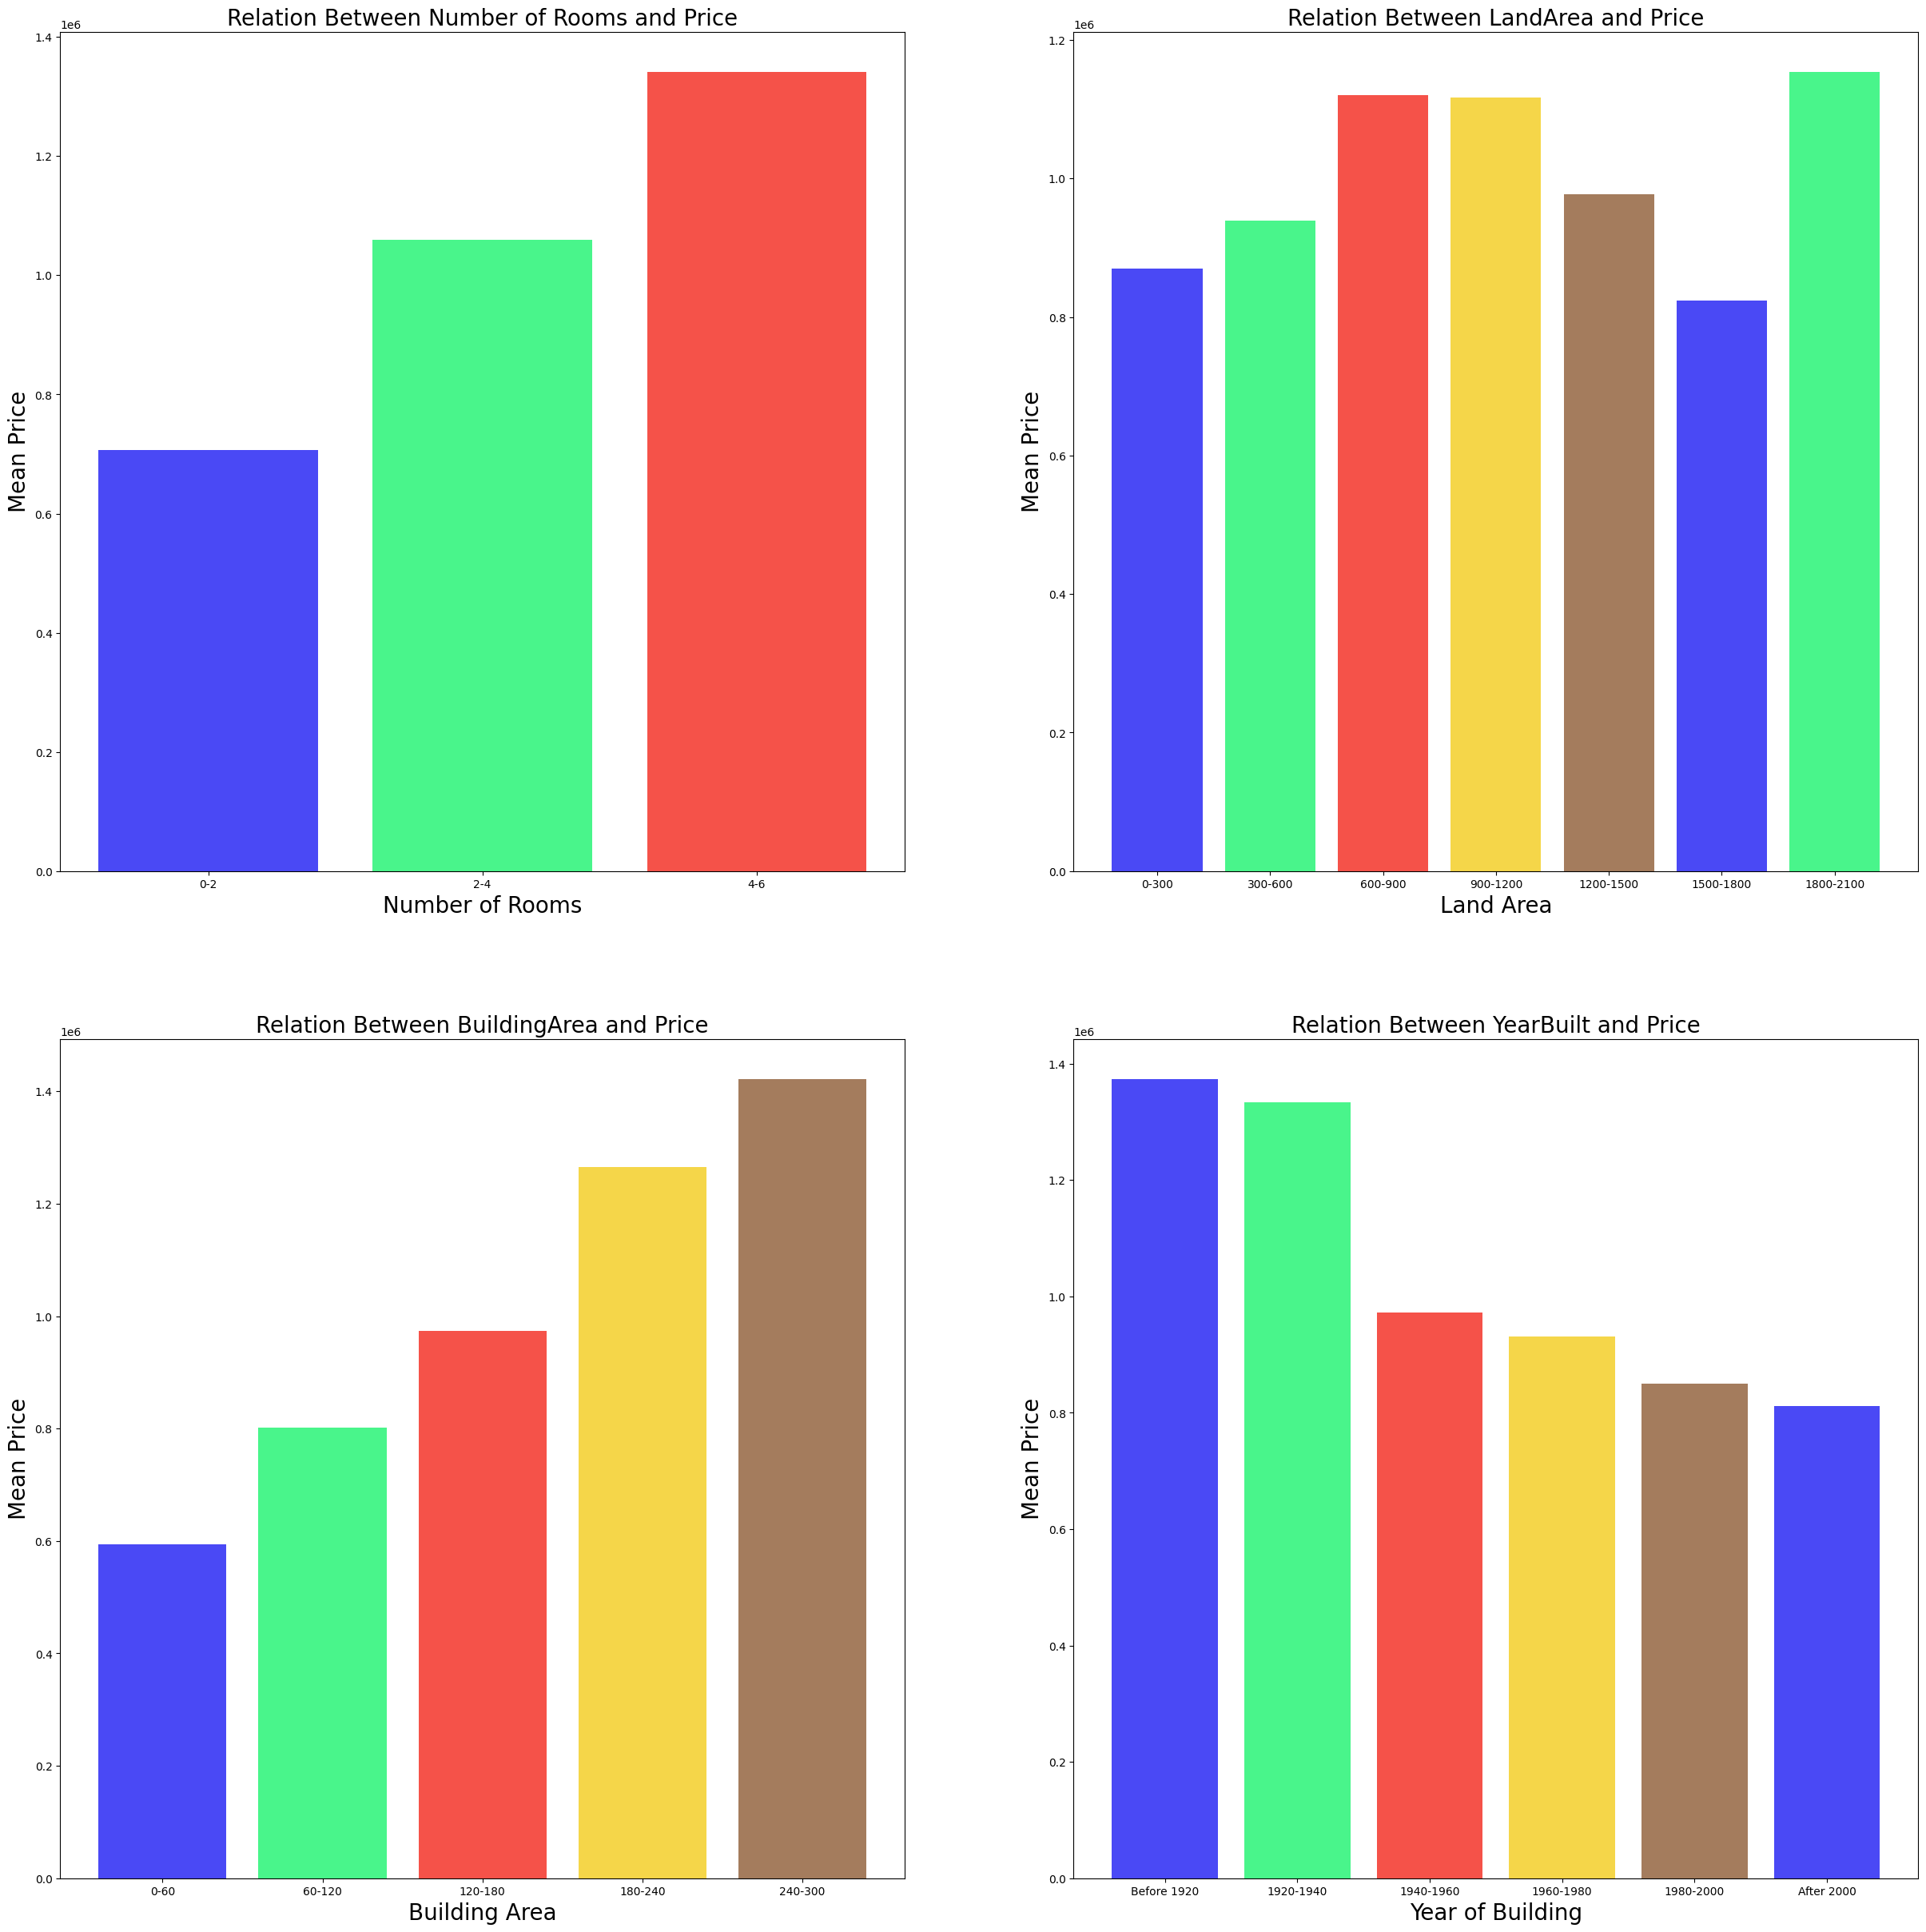

In [ ]:
colors=["#4A49F5", "#49F58B", "#F55249", "#F5D649", "#A47C5D" ]



room_y_axis=df_copy.groupby('RoomsBin')['Price'].mean()
landsize_y_axis=df_copy.groupby('LandSizeBin')['Price'].mean()
buildingarea_y_axis=df_copy.groupby('BuildingAreaBin')['Price'].mean()
yearbuilt_y_axis=df_copy.groupby('YearBuiltBin')['Price'].mean()


fig, ((ax11, ax12),(ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(30,30))


ax11.bar(room_labels, room_y_axis , color=colors)
ax11.set_title('Relation Between Number of Rooms and Price', fontdict={'fontsize': 20})
ax11.set_xlabel('Number of Rooms', fontdict={'fontsize': 20})
ax11.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax12.bar(landsize_labels, landsize_y_axis , color=colors)
ax12.set_title('Relation Between LandArea and Price', fontdict={'fontsize': 20})
ax12.set_xlabel('Land Area', fontdict={'fontsize': 20})
ax12.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax21.bar(building_area_labels, buildingarea_y_axis , color=colors)
ax21.set_title('Relation Between BuildingArea and Price', fontdict={'fontsize': 20})
ax21.set_xlabel('Building Area', fontdict={'fontsize': 20})
ax21.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax22.bar(year_built_labels, yearbuilt_y_axis , color=colors)
ax22.set_title('Relation Between YearBuilt and Price', fontdict={'fontsize': 20})
ax22.set_xlabel('Year of Building', fontdict={'fontsize': 20})
ax22.set_ylabel('Mean Price', fontdict={'fontsize': 20})

plt.show()

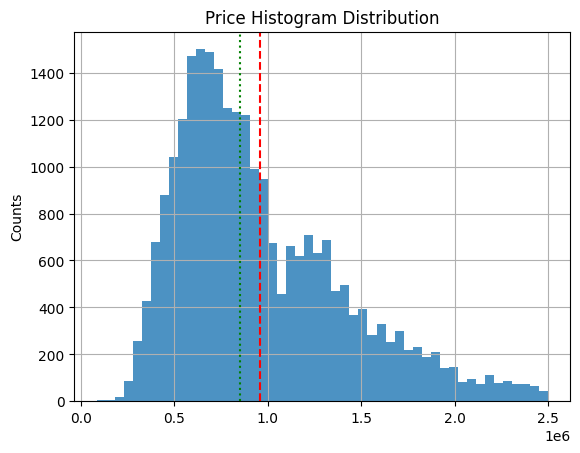

In [ ]:
df_copy['Price'].hist(bins=50, label='Price', alpha=0.8)
plt.axvline(np.mean(df_copy['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");

<ipython-input-96-8a3b79f050fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


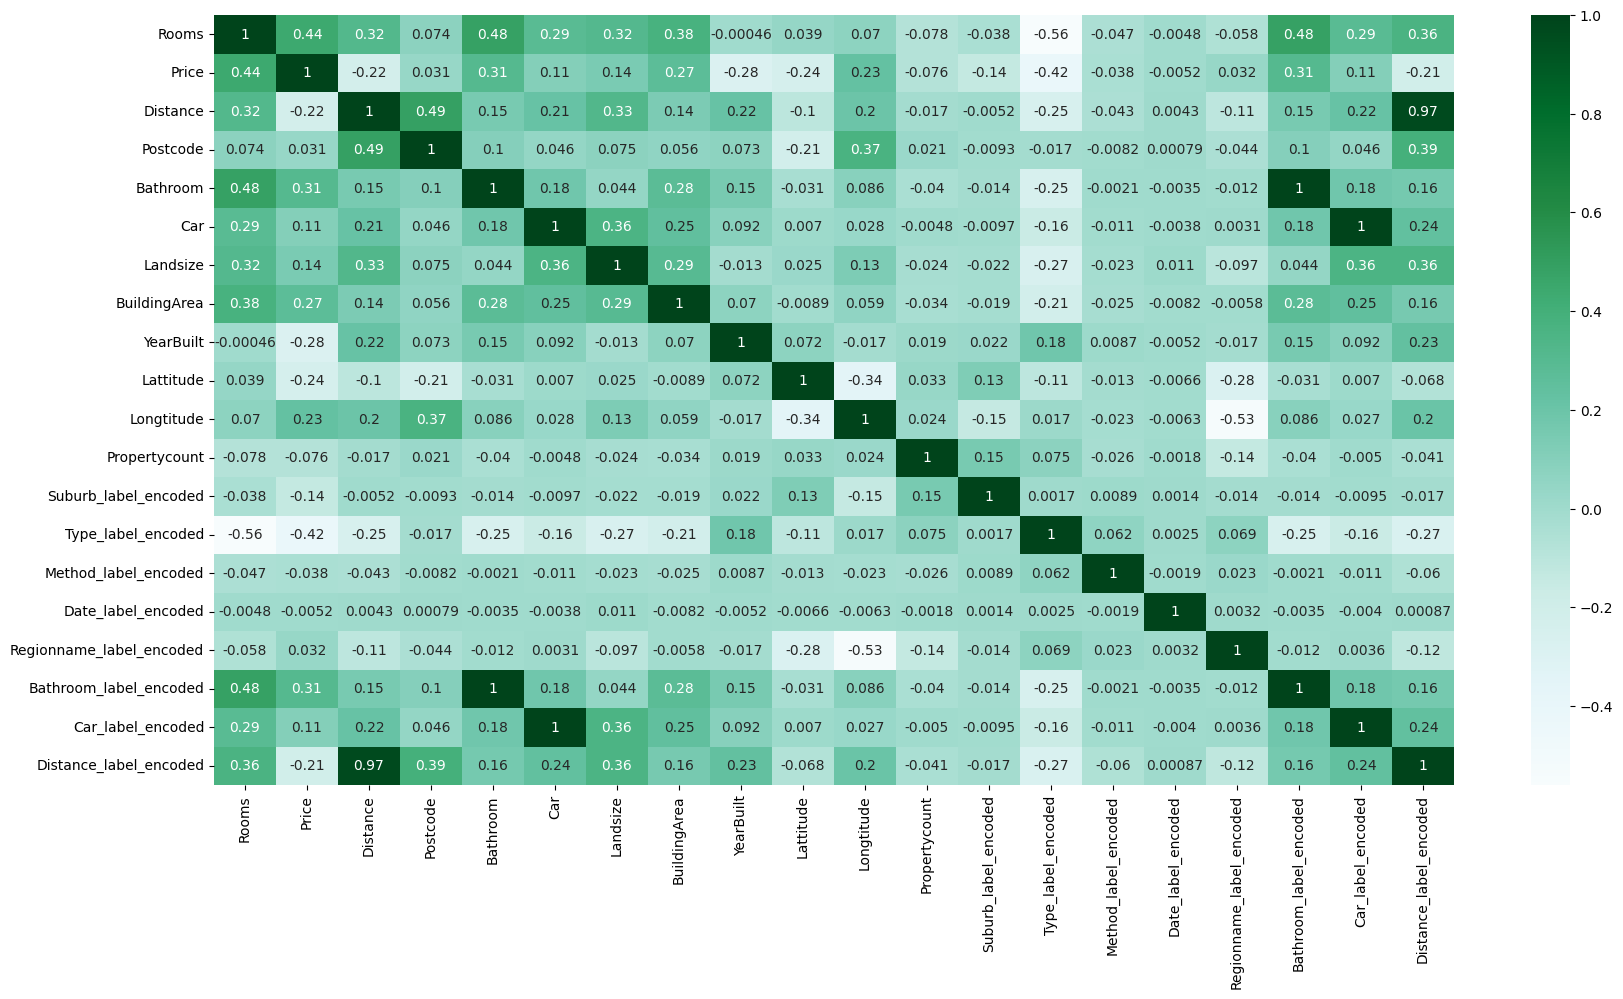

In [ ]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="BuGn", annot=True);

In [ ]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

                 Number of Missing Values  Ratio of Missing Values
Suburb                                  0                 0.000000
Address                                 0                 0.000000
Rooms                                   0                 0.000000
Type                                    0                 0.000000
Price                                   0                 0.000000
Method                                  0                 0.000000
SellerG                                 0                 0.000000
Date                                    0                 0.000000
Distance                                0                 0.000000
Postcode                                1                 0.003944
Bathroom                                0                 0.000000
Car                                     0                 0.000000
Landsize                                0                 0.000000
BuildingArea                            0                 0.00

In [ ]:
label_encoder = LabelEncoder()

one_hot_encoder = OneHotEncoder()

for categorical_column in cat_cols:
    # Etiket kodlama
    df_copy[f"{categorical_column}_label_encoded"] = label_encoder.fit_transform(df_copy[categorical_column])

    # Tek seferlik kodlama (One-Hot Encoding)
    one_hot_encoded = one_hot_encoder.fit_transform(df_copy[[categorical_column]]).toarray()
    categories = label_encoder.classes_
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{categorical_column}_{cat}" for cat in categories])
    df_copy = pd.concat([df_copy, one_hot_encoded_df], axis=1)

# Artık kategorik sütunları ve kodlamalarını ekledik, eski sütunları kaldırabiliriz
df_copy = df_copy.drop(cat_cols, axis=1)

KeyError: ignored

## Model Training

In [ ]:
y = df_copy["Price"]
X = df_copy.drop(['Price', 'RoomsBin', 'LandSizeBin', 'YearBuiltBin', 'BuildingAreaBin', "Address", "SellerG", "CouncilArea", "Date", "Postcode", "Lattitude", "Longtitude", "Propertycount"]+cat_cols, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

KeyError: ignored

In [ ]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of x_train is (20284, 12)
Shape of x_test is (5072, 12)
Shape of y_train is (20284,)
Shape of y_test is (5072,)


In [ ]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}
           }

In [ ]:
for name, model in models.items():
    cv_results = cross_validate(model['model'], X, y, cv=10, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])
    print(f'########## {name} ##########')
    print(f'MAE: {round(cv_results["test_neg_mean_absolute_error"].mean(), 4)}')
    print(f'MSE: {round(cv_results["test_neg_mean_squared_error"].mean(), 4)}')
    print(f'RMSE: {round(cv_results["test_neg_root_mean_squared_error"].mean(), 4)}')
    print(f'R2: {round(cv_results["test_r2"].mean(), 4)}')

########## Lasso ##########
MAE: -252997.4642
MSE: -106573977987.8432
RMSE: -326155.2892
R2: 0.4717
########## LinearRegression ##########
MAE: -252997.4754
MSE: -106573978212.1834
RMSE: -326155.2908
R2: 0.4717
########## Ridge ##########
MAE: -252997.5229
MSE: -106573971061.855
RMSE: -326155.2759
R2: 0.4717
########## ElasticNet ##########
MAE: -260946.6909
MSE: -113173378858.7287
RMSE: -336087.7236
R2: 0.4394
########## KNeighborsRegressor ##########
MAE: -259487.5847
MSE: -126943111217.8786
RMSE: -355687.6094
R2: 0.3723


KeyboardInterrupt: ignored